In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Orginial Dataset

In [11]:
df=pd.read_csv(r"Tesla.csv")
df.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,07/01/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,07/02/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,07/06/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,07/07/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,07/08/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
7,07/09/2010,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
8,07/12/2010,17.950001,18.070000,17.000000,17.049999,2202500,17.049999
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,2680100,18.139999


In [12]:
df.shape

(1692, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [14]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [15]:
# object to integer
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [17]:
# find the high year 
df['Date'].dt.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int32)

## filter Before dataset the year 2017 

In [18]:
# df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_20 = df[df['Year'] < 2017]


In [19]:
df_20

,Date,Open,High,Low,Close,Volume,Adj Close,Year
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,2010
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,2010
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,2010
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,2010
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,2010
...,...,...,...,...,...,...,...,...
1635,2016-12-23,208.000000,213.449997,207.710007,213.339996,4670500,213.339996,2016
1636,2016-12-27,214.880005,222.250000,214.419998,219.529999,5915700,219.529999,2016
1637,2016-12-28,221.529999,223.800003,217.199997,219.740005,3782500,219.740005,2016
1638,2016-12-29,218.559998,219.199997,214.119995,214.679993,4045000,214.679993,2016


In [20]:
# Find the years 
df_20['Date'].dt.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int32)

In [21]:
df_20.shape

(1640, 8)

In [22]:
df_20.describe()

,Date,Open,High,Low,Close,Volume,Adj Close,Year
count,1640,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000,1640.000000
mean,2013-09-29 08:43:19.024390144,128.700585,130.990183,126.264738,128.659506,4.237371e+06,128.659506,2013.224390
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000,2010.000000
25%,2012-02-12 06:00:00,29.742500,30.247500,28.902500,29.539999,1.160100e+06,29.539999,2012.000000
50%,2013-09-30 12:00:00,147.834999,150.354996,142.715004,147.425003,3.100800e+06,147.425003,2013.000000
75%,2015-05-18 06:00:00,217.367504,220.825001,213.607506,217.662495,5.620325e+06,217.662495,2015.000000
max,2016-12-30 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009,2016.000000
std,NaN,93.345356,94.737840,91.842670,93.315558,4.338177e+06,93.315558,1.893024


In [23]:
# # find the Before 2017 stock price,  Assuming df_20 is the dataset before 2017
# check the difference open to close Price-change and price-Range



# Step 1: Calculate 'Price-Change' and 'Price-Range'
df_20['Price-Change'] = df_20['Close'] - df_20['Open']
df_20['Price-Range'] = df_20['High'] - df_20['Low']

# Step 2: Add '1-day MA' (since it's the close price for the current day)
df_20['1-day MA'] = df_20['Close']

# Step 3: Add 'Next_Close' (next day's close)
df_20['Next_Close'] = df_20['Close'].shift(-1)

# Step 4: Initialize 'Price_Up' to 0
df_20['Price_Up'] = 0

# Step 5: Set 'Price_Up' to 1 where Next_Close > Close
df_20.loc[df_20['Next_Close'] > df_20['Close'], 'Price_Up'] = 1

# Verify the new columns
df_20.head(5)


C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\1333663923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['Price-Change'] = df_20['Close'] - df_20['Open']
C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\1333663923.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['Price-Range'] = df_20['High'] - df_20['Low']
C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\1333663923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Price-Change,Price-Range,1-day MA,Next_Close,Price_Up
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,2010,4.889999,7.459999,23.889999,23.830000,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,2010,-1.960001,7.120001,23.830000,21.959999,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,2010,-3.040001,5.650000,21.959999,19.200001,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2010,-3.799999,4.390001,19.200001,16.110001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,2010,-3.889999,4.170000,16.110001,15.800000,0


In [24]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1640 entries, 0 to 1639
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1640 non-null   datetime64[ns]
 1   Open          1640 non-null   float64       
 2   High          1640 non-null   float64       
 3   Low           1640 non-null   float64       
 4   Close         1640 non-null   float64       
 5   Volume        1640 non-null   int64         
 6   Adj Close     1640 non-null   float64       
 7   Year          1640 non-null   int32         
 8   Price-Change  1640 non-null   float64       
 9   Price-Range   1640 non-null   float64       
 10  1-day MA      1640 non-null   float64       
 11  Next_Close    1639 non-null   float64       
 12  Price_Up      1640 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(2)
memory usage: 173.0 KB


In [25]:
df_20.describe()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Price-Change,Price-Range,1-day MA,Next_Close,Price_Up
count,1640,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1639.000000,1640.000000
mean,2013-09-29 08:43:19.024390144,128.700585,130.990183,126.264738,128.659506,4.237371e+06,128.659506,2013.224390,-0.041079,4.725445,128.659506,128.723429,0.510366
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000,2010.000000,-20.509994,0.250000,15.800000,15.800000,0.000000
25%,2012-02-12 06:00:00,29.742500,30.247500,28.902500,29.539999,1.160100e+06,29.539999,2012.000000,-1.239993,1.209999,29.539999,29.559999,0.000000
50%,2013-09-30 12:00:00,147.834999,150.354996,142.715004,147.425003,3.100800e+06,147.425003,2013.000000,-0.050001,4.000000,147.425003,147.470001,1.000000
75%,2015-05-18 06:00:00,217.367504,220.825001,213.607506,217.662495,5.620325e+06,217.662495,2015.000000,1.040003,7.002502,217.662495,217.674995,1.000000
max,2016-12-30 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009,2016.000000,20.770004,36.399994,286.040009,286.040009,1.000000
std,NaN,93.345356,94.737840,91.842670,93.315558,4.338177e+06,93.315558,1.893024,3.669098,4.101897,93.315558,93.308114,0.500045


In [26]:
df_20['Next_Close'].isnull().sum()

np.int64(1)

In [27]:

# Calculate the mean of 'Next_Close' in the df DataFrame
mean = df_20['Next_Close'].mean()

# Fill NaN values in 'Next_Close' column in the df_20 DataFrame with the calculated mean
df_20['Next_Close'] = df_20['Next_Close'].fillna(mean)


C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\2874294538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['Next_Close'] = df_20['Next_Close'].fillna(mean)


In [28]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1640 entries, 0 to 1639
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1640 non-null   datetime64[ns]
 1   Open          1640 non-null   float64       
 2   High          1640 non-null   float64       
 3   Low           1640 non-null   float64       
 4   Close         1640 non-null   float64       
 5   Volume        1640 non-null   int64         
 6   Adj Close     1640 non-null   float64       
 7   Year          1640 non-null   int32         
 8   Price-Change  1640 non-null   float64       
 9   Price-Range   1640 non-null   float64       
 10  1-day MA      1640 non-null   float64       
 11  Next_Close    1640 non-null   float64       
 12  Price_Up      1640 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(2)
memory usage: 173.0 KB


# After

In [29]:
# filter the 2017
 
df_2017 = df[df['Date'].dt.year == 2017]

# Show the filtered DataFrame
df_2017.shape

(52, 8)

In [30]:
# Find the years 
df_2017['Date'].dt.year.unique()

array([2017], dtype=int32)

In [31]:
df_2017.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
Year         0
dtype: int64

In [32]:
# After a Datetime 
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1640 to 1691
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       52 non-null     datetime64[ns]
 1   Open       52 non-null     float64       
 2   High       52 non-null     float64       
 3   Low        52 non-null     float64       
 4   Close      52 non-null     float64       
 5   Volume     52 non-null     int64         
 6   Adj Close  52 non-null     float64       
 7   Year       52 non-null     int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 3.5 KB


In [33]:
df_2017.describe()

,Date,Open,High,Low,Close,Volume,Adj Close,Year
count,52,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.0
mean,2017-02-08 22:09:13.846153728,250.426539,253.969808,247.681539,251.301924,5.323187e+06,251.301924,2017.0
min,2017-01-03 00:00:00,214.750000,220.330002,210.960007,216.990005,2.186700e+06,216.990005,2017.0
25%,2017-01-22 06:00:00,245.300007,246.762505,242.587498,244.487496,3.657700e+06,244.487496,2017.0
50%,2017-02-08 12:00:00,250.370002,253.239998,248.295006,251.270004,4.708900e+06,251.270004,2017.0
75%,2017-02-28 06:00:00,257.560005,261.589996,255.720002,257.827492,6.316150e+06,257.827492,2017.0
max,2017-03-17 00:00:00,280.309998,287.390015,278.609985,280.980011,1.486700e+07,280.980011,2017.0
std,NaN,15.567971,15.739757,15.238936,14.839125,2.437428e+06,14.839125,0.0


In [34]:
# # find the 2017 stock price 
# check the difference open to close Price-change and price-Range


# df_2017['Price-Change'] = df_2017['Close'] - df_2017['Open']
# df_2017['Price-Range'] = df_2017['High'] - df_2017['Low']

# # 7 day of Month
# df_2017['7-day MA']=df_2017['Close'].rolling(window=7).mean()

In [35]:
# Calculate additional features
df_2017['Price-Change'] = df_2017['Close'] - df_2017['Open']
df_2017['Price-Range'] = df_2017['High'] - df_2017['Low']
df_2017['1-day MA'] = df_2017['Close']

# Shift next day's close
df_2017['Next_Close'] = df_2017['Close'].shift(-1)

# Define target: 1 if price goes up, 0 otherwise
df_2017['Price_Up'] = 0
df_2017.loc[df_2017['Next_Close'] > df_2017['Close'], 'Price_Up'] = 1

# Verify the new columns
df_2017.head(2)


C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\2182368503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Price-Change'] = df_2017['Close'] - df_2017['Open']
C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\2182368503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Price-Range'] = df_2017['High'] - df_2017['Low']
C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\2182368503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Price-Change,Price-Range,1-day MA,Next_Close,Price_Up
1640,2017-01-03,214.860001,220.330002,210.960007,216.990005,5923300,216.990005,2017,2.130004,9.369995,216.990005,226.990005,1
1641,2017-01-04,214.750000,228.000000,214.309998,226.990005,11213500,226.990005,2017,12.240005,13.690002,226.990005,226.750000,0


In [36]:
# # Check the Missing values
df_2017['Price-Change'].isnull().value_counts(), df_2017['Price-Range'].isnull().value_counts(),df_2017['1-day MA'].isnull().value_counts()

(Price-Change
 False    52
 Name: count, dtype: int64,
 Price-Range
 False    52
 Name: count, dtype: int64,
 1-day MA
 False    52
 Name: count, dtype: int64)

In [37]:
df_2017.sample(4)

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Price-Change,Price-Range,1-day MA,Next_Close,Price_Up
1653,2017-01-23,245.850006,250.889999,245.500000,248.919998,6262900,248.919998,2017,3.069992,5.389999,248.919998,254.610001,1
1682,2017-03-06,247.910004,251.699997,247.509995,251.210007,3351200,251.210007,2017,3.300003,4.190002,251.210007,248.589996,0
1668,2017-02-13,270.739990,280.790009,270.510010,280.600006,7029600,280.600006,2017,9.860016,10.279999,280.600006,280.980011,1
1666,2017-02-09,266.250000,271.179993,266.149994,269.200012,7820200,269.200012,2017,2.950012,5.029999,269.200012,269.230011,1


In [38]:
# fill the Missing vaules by mean()

mean_1_day=df_2017['1-day MA'].mean()

df_2017['1-day MA']=df_2017['1-day MA'].fillna(mean_1_day)

mean_next_close=df_2017['Next_Close'].mean()
df_2017['Next_Close']=df_2017['Next_Close'].fillna(mean_next_close)

df_2017.isnull().sum()

C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\503683473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['1-day MA']=df_2017['1-day MA'].fillna(mean_1_day)
C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\503683473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Next_Close']=df_2017['Next_Close'].fillna(mean_next_close)


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Adj Close       0
Year            0
Price-Change    0
Price-Range     0
1-day MA        0
Next_Close      0
Price_Up        0
dtype: int64

In [39]:
df_2017.sample(1)

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Price-Change,Price-Range,1-day MA,Next_Close,Price_Up
1678,2017-02-28,244.190002,251.0,243.899994,249.990005,6065600,249.990005,2017,5.800003,7.100006,249.990005,250.020004,1


## EDA

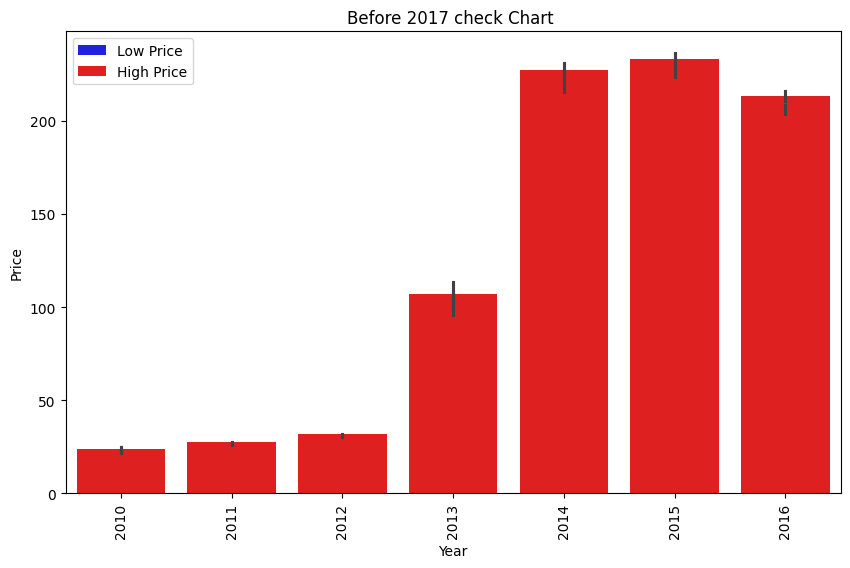

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Low', data=df_20, color='blue', label='Low Price')  # Blue for Low
sns.barplot(x='Year', y='High', data=df_20, color='red', label='High Price')  # Red for High

plt.title("Before 2017 check Chart ")
plt.xlabel('Year')
plt.ylabel('Price')

plt.legend()  # Show legend for the different bars
plt.xticks(rotation=90)  # Rotate x-axis labels if dates overlap
plt.show()


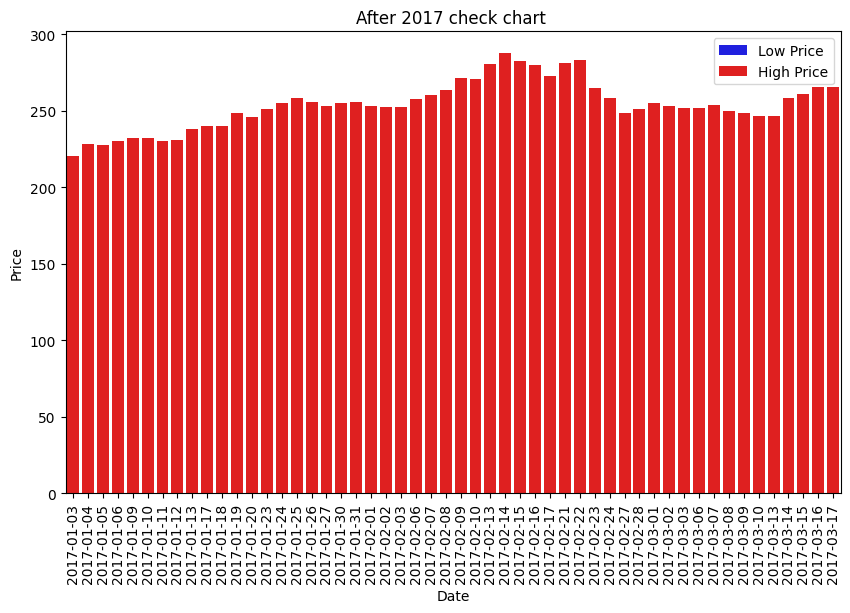

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Low', data=df_2017, color='blue', label='Low Price')  # Blue for Low
sns.barplot(x='Date', y='High', data=df_2017, color='red', label='High Price')  # Red for High
plt.title("After 2017 check chart ")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()  # Show legend for the different bars
plt.xticks(rotation=90)  # Rotate x-axis labels if dates overlap
plt.show()



C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\1923724328.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Blue'` for the same effect.

  sns.barplot(data=df_20, x='Year', y='Volume', hue='High', color='Blue')


Text(0, 0.5, 'Volume')

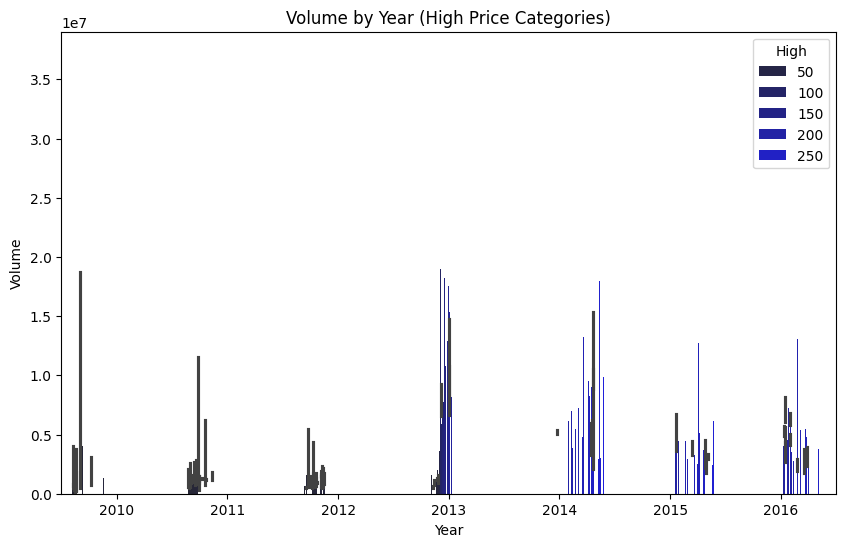

In [42]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_20, x='Year', y='Volume', hue='High', color='Blue')

plt.title("Volume by Year (High Price Categories)")
plt.xlabel('Year')  # X-axis labeled as Year
plt.ylabel('Volume') 


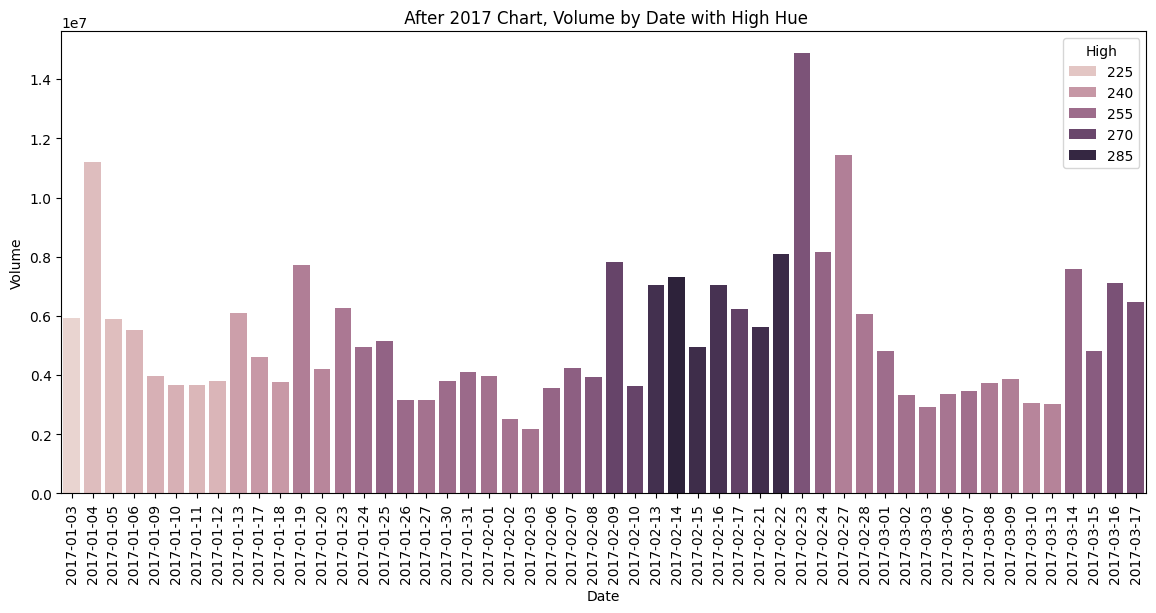

In [43]:
plt.figure(figsize=(14, 6))

# Bar plot with hue based on 'High' and color automatically assigned
sns.barplot(data=df_2017, x='Date', y='Volume', hue='High')
plt.title(' After 2017 Chart, Volume by Date with High Hue')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.legend(title='High')
plt.xticks(rotation=90)  # Rotate the x-axis labels to avoid overlap

plt.show()


### The melt function works by transforming a DataFrame into a format where:

##### The melt function is used when you want to convert your data from wide format to long format. It is commonly used when

##### You have multiple columns that represent the same type of data (like High, Low, Close prices).
##### You want to combine these columns into a single column to make the data easier to analyze or visualize.

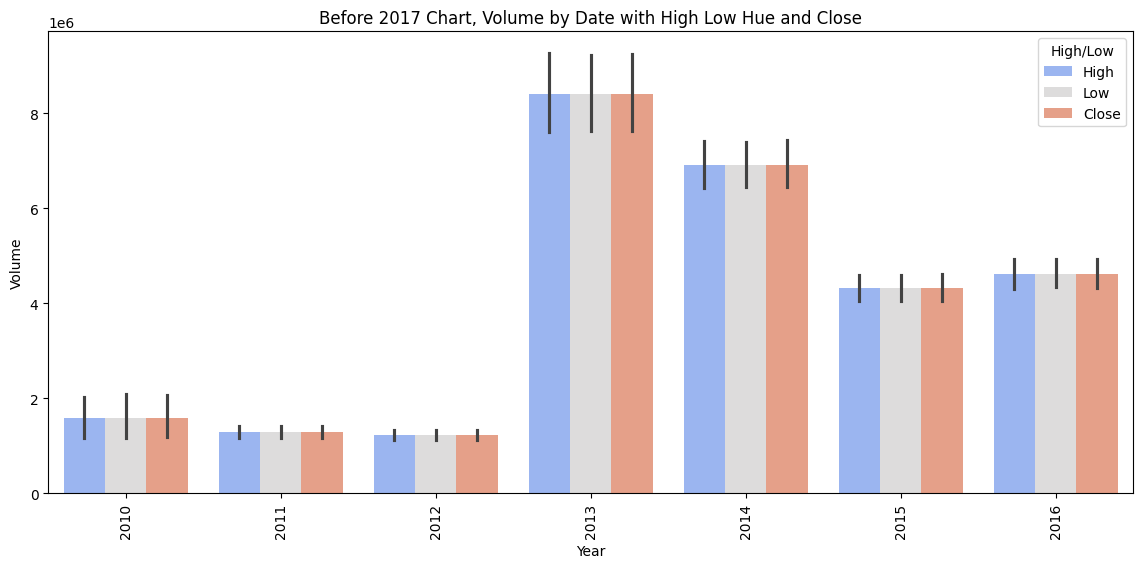

In [44]:
# Melt the DataFrame to combine 'High' and 'Low' into one column
df_melted_20 = pd.melt(df_20, id_vars=['Year', 'Volume'], value_vars=['High', 'Low','Close'], var_name='Category', value_name='Price')

# Now plot the data
plt.figure(figsize=(14, 6))

# Plot the melted data, with 'Category' as hue to distinguish High and Low
sns.barplot(data=df_melted_20, x='Year', y='Volume', hue='Category', palette='coolwarm')

plt.title("Before 2017 Chart, Volume by Date with High Low Hue and Close")
plt.xlabel("Year")
plt.ylabel("Volume")

plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.legend(title='High/Low')  # Add a legend to differentiate between High and Low

plt.show()


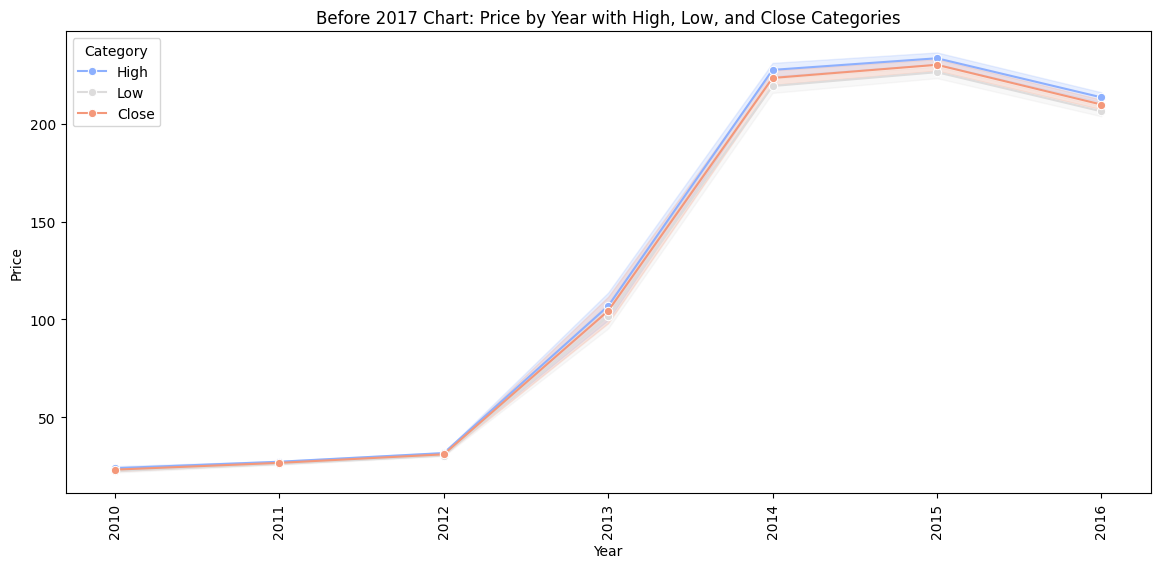

In [45]:
# Melt the DataFrame to combine 'High', 'Low' and 'Close' into one column
df_melted_20 = pd.melt(df_20, id_vars=['Year', 'Volume'], value_vars=['High', 'Low','Close'], var_name='Category', value_name='Price')

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot the melted data with 'Category' as hue to distinguish High, Low, and Close prices
sns.lineplot(data=df_melted_20, x='Year', y='Price', hue='Category', palette='coolwarm', marker='o')

plt.title("Before 2017 Chart: Price by Year with High, Low, and Close Categories")
plt.xlabel("Year")
plt.ylabel("Price")

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Add a legend to differentiate between High, Low, and Close prices
plt.legend(title='Category')

plt.show()


In [46]:
# Original dataset Before 2017
df_20.sample(2)

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Price-Change,Price-Range,1-day MA,Next_Close,Price_Up
1585,2016-10-13,200.500000,200.899994,197.050003,200.240005,2494600,200.240005,2016,-0.259995,3.849991,200.240005,196.509995,0
1505,2016-06-21,220.679993,222.570007,218.809998,219.610001,4529000,219.610001,2016,-1.069992,3.760009,219.610001,196.660004,0


In [47]:
df_melted_20.sample(2)

,Year,Volume,Category,Price
2047,2012,623700,Low,31.290001
2476,2013,13320400,Low,160.149994


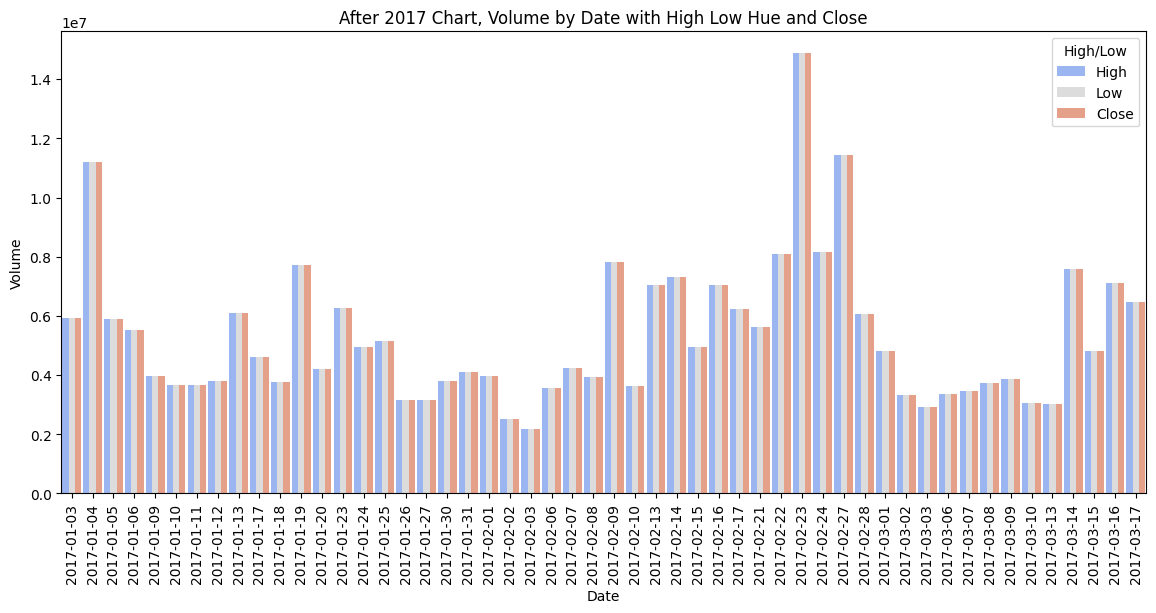

In [48]:
# Step 1: Melt the DataFrame for both High and Low
df_melted_2017 = pd.melt(df_2017, id_vars=['Date', 'Volume'], value_vars=['High', 'Low','Close'], var_name='Category', value_name='Price')

# Step 2: Plot the data using the melted DataFrame
plt.figure(figsize=(14, 6))

# Plot the melted data with 'Category' as hue (High and Low)
sns.barplot(data=df_melted_2017, x='Date', y='Volume', hue='Category', palette='coolwarm', width=0.9)

plt.title('After 2017 Chart, Volume by Date with High Low Hue and Close')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.legend(title='High/Low')
plt.xticks(rotation=90)  # Rotate the x-axis labels to avoid overlap

plt.show()


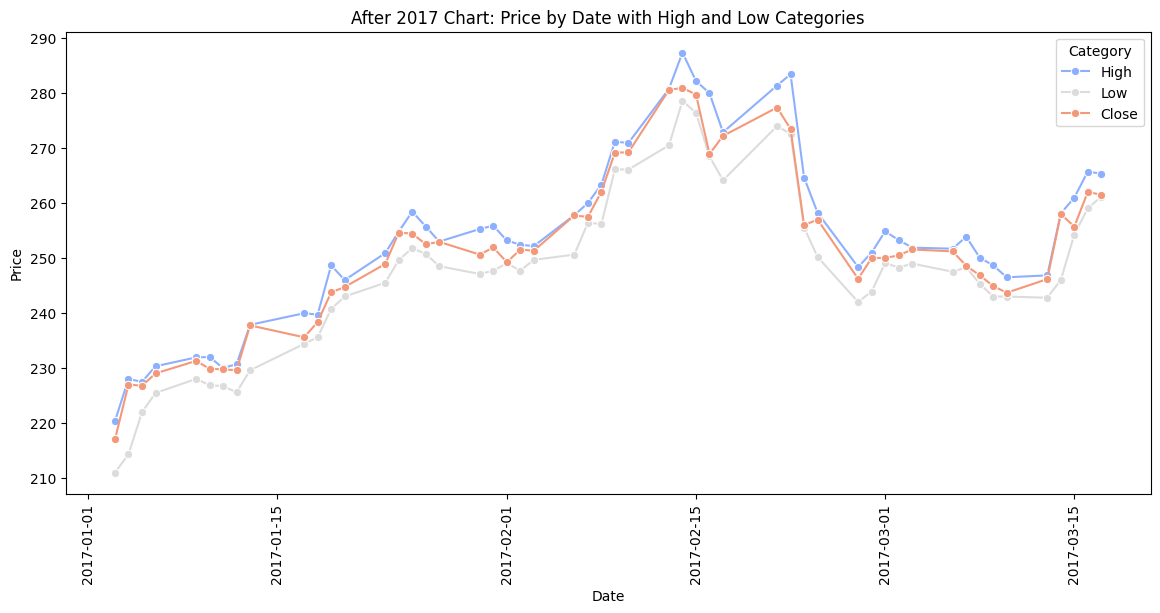

In [49]:

# Melt the DataFrame to combine 'High', 'Low' into one column
df_melted_simple = pd.melt(df_2017, id_vars=['Date'], value_vars=['High', 'Low','Close'], var_name='Category', value_name='Price')

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot the melted data with 'Category' as hue to distinguish High and Low prices
sns.lineplot(data=df_melted_simple, x='Date', y='Price', hue='Category', palette='coolwarm', marker='o')

plt.title("After 2017 Chart: Price by Date with High and Low Categories")
plt.xlabel("Date")
plt.ylabel("Price")

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Add a legend to differentiate between High and Low prices
plt.legend(title='Category')

plt.show()


In [50]:
# Original dataset After 2017
df_2017.sample(2)

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Price-Change,Price-Range,1-day MA,Next_Close,Price_Up
1685,2017-03-09,247.630005,248.660004,243.000000,244.899994,3861500,244.899994,2017,-2.730011,5.660004,244.899994,243.690002,0
1649,2017-01-17,236.699997,239.960007,234.369995,235.580002,4617500,235.580002,2017,-1.119995,5.590012,235.580002,238.360001,1


In [51]:
df_melted_simple.sample(2)

,Date,Category,Price
46,2017-03-10,High,246.500000
27,2017-02-10,High,270.950012


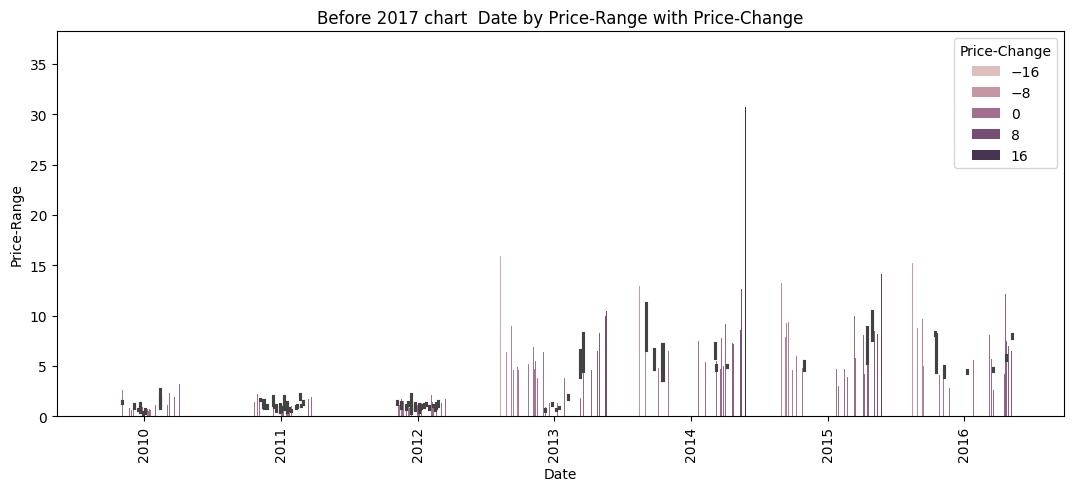

In [52]:
plt.figure(figsize=(13,5))
sns.barplot(x='Year',data=df_20,y='Price-Range',hue='Price-Change',native_scale=True)
plt.title("Before 2017 chart  Date by Price-Range with Price-Change")
plt.xlabel("Date")
plt.ylabel("Price-Range")
plt.xticks(rotation=90)
plt.show()

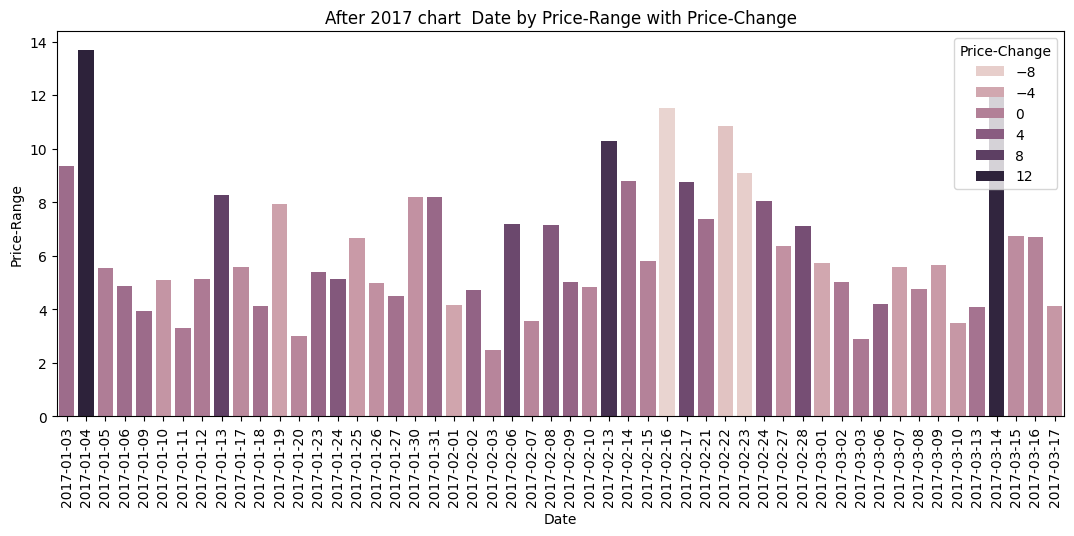

In [53]:
plt.figure(figsize=(13,5))
sns.barplot(x='Date',data=df_2017,y='Price-Range',hue='Price-Change')
plt.title("After 2017 chart  Date by Price-Range with Price-Change")
plt.xlabel("Date")
plt.ylabel("Price-Range")
plt.xticks(rotation=90)
plt.show()

In [54]:
df_melted_simple.sample(3)

,Date,Category,Price
82,2017-02-15,Low,276.440002
67,2017-01-25,Low,251.800003
91,2017-03-01,Low,249.110001


In [55]:
df_2017['1-day MA'].isnull().mean()*100

np.float64(0.0)

C:\Users\Tech Planet L P\AppData\Local\Temp\ipykernel_5852\3675955381.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data=df_2017, x='Price-Range', y='1-day MA', hue='Price-Change', color='red')


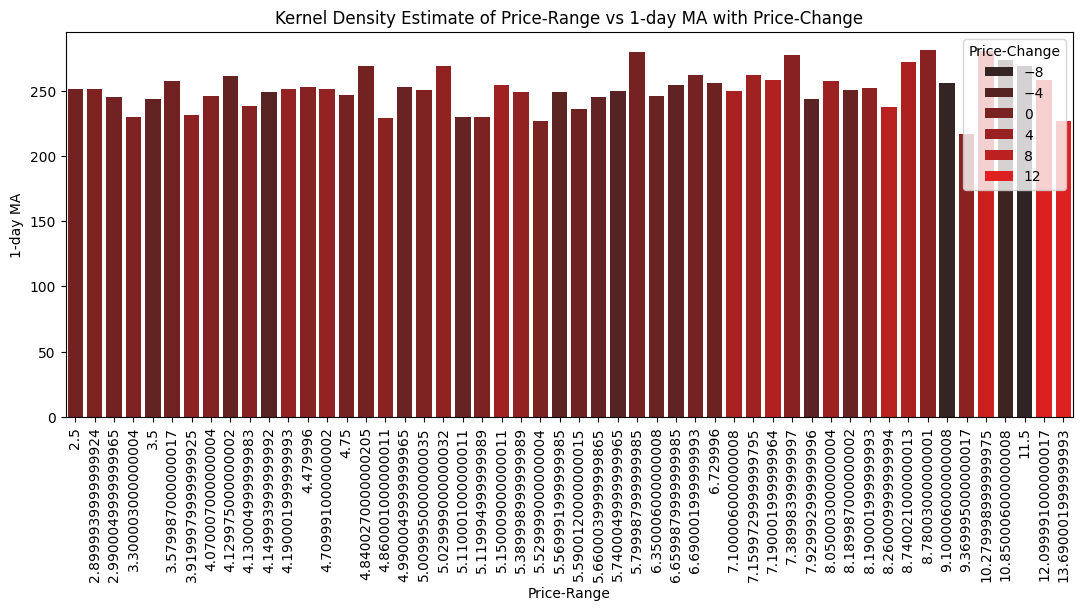

In [77]:
plt.figure(figsize=(13, 5))

# KDE plot for 'Price-Range' and '7-day MA', colored by 'Price-Change'
sns.barplot(data=df_2017, x='Price-Range', y='1-day MA', hue='Price-Change', color='red')

plt.title("Kernel Density Estimate of Price-Range vs 1-day MA with Price-Change")
plt.xlabel("Price-Range")
plt.ylabel("1-day MA")
plt.xticks(rotation=90)
plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Price-Change'}>,
        <Axes: title={'center': 'Price-Range'}>,
        <Axes: title={'center': '1-day MA'}>,
        <Axes: title={'center': 'Next_Close'}>],
       [<Axes: title={'center': 'Price_Up'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

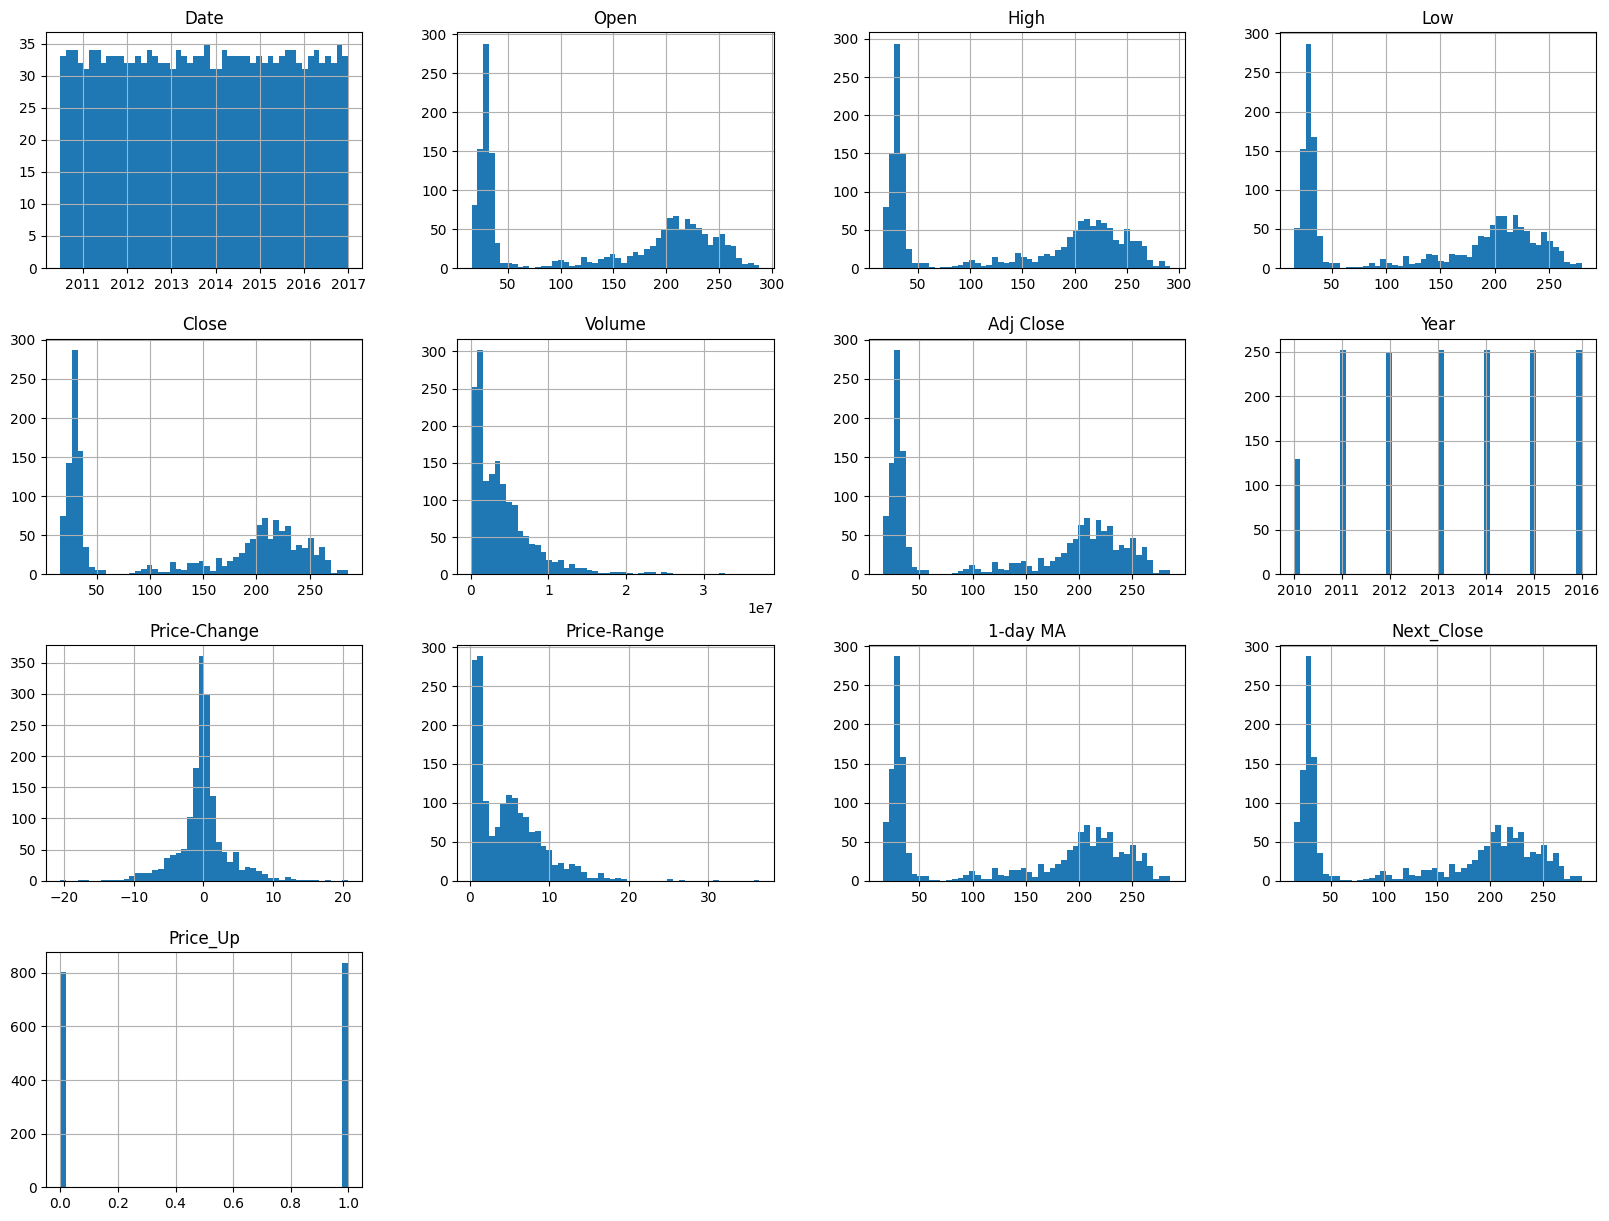

In [57]:
df_20.hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Price-Change'}>,
        <Axes: title={'center': 'Price-Range'}>,
        <Axes: title={'center': '1-day MA'}>,
        <Axes: title={'center': 'Next_Close'}>],
       [<Axes: title={'center': 'Price_Up'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

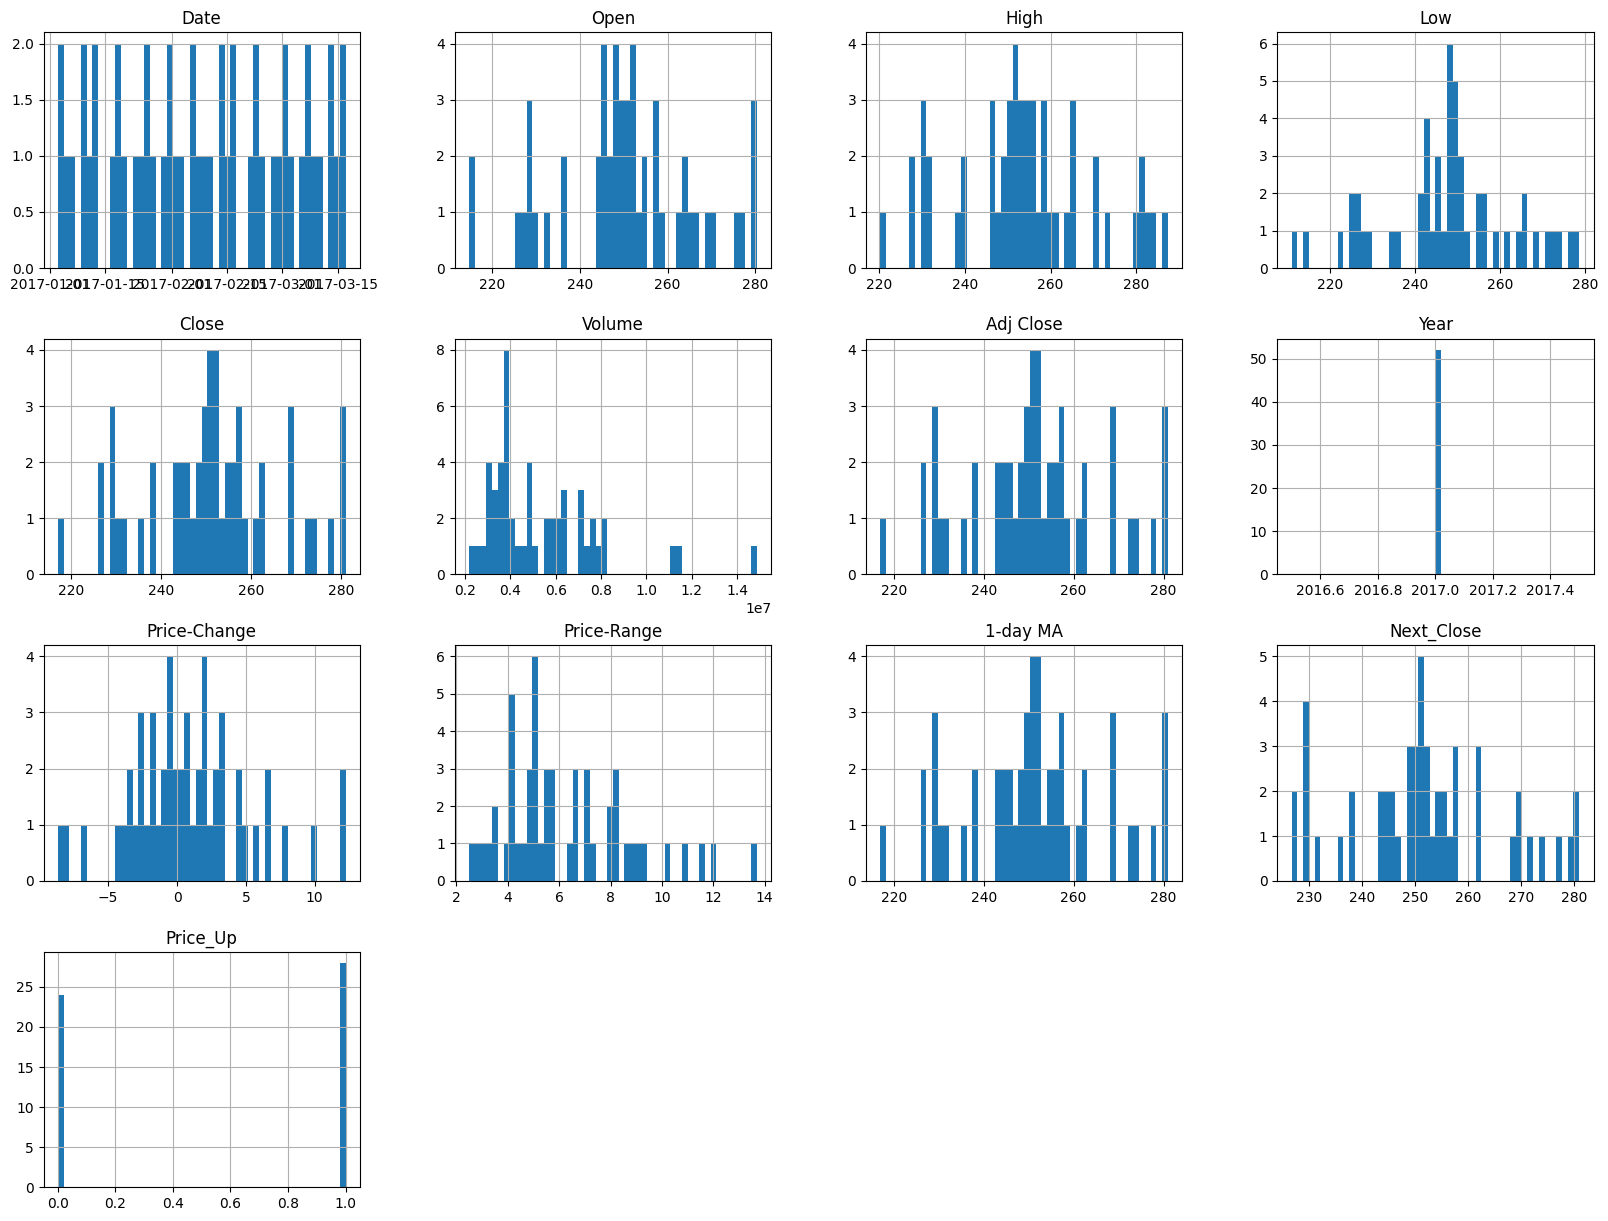

In [58]:
df_2017.hist(bins=50, figsize=(20,15))

In [59]:
df_20.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Year',
       'Price-Change', 'Price-Range', '1-day MA', 'Next_Close', 'Price_Up'],
      dtype='object')

In [60]:
df_2017.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Year',
       'Price-Change', 'Price-Range', '1-day MA', 'Next_Close', 'Price_Up'],
      dtype='object')

# Model

In [61]:
# Initialize the XGBoost model
xg_model = XGBRegressor(n_estimators=100, random_state=42)

# Wrap the XGBRegressor with MultiOutputRegressor for multi-target regression
multi_target_model = MultiOutputRegressor(xg_model)

# Define X (features) and y (targets) for training
X_train = df_20[['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Price-Change', 'Price-Range', '1-day MA']]
y_train = df_20[['Next_Close', 'Price_Up']]

X_test = df_2017[['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Price-Change', 'Price-Range', '1-day MA']]
y_test = df_2017[['Next_Close', 'Price_Up']]

In [62]:
# Normalize the features
scaler = MinMaxScaler()
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

# Train the model
multi_target_model.fit(X_train_normal, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [80]:
# Function to handle user input and use the dataset
def predict_user_input(user_open, user_high, user_low, user_close, user_volume, user_year):
    # Combine user input into a numpy array that matches the training data format
    user_input = np.array([[user_open, user_high, user_low, user_close, 
                            user_volume, user_year, 0, 0, 0]])  # Pass 0 for features not required

    # Normalize the user input using the same scaler
    user_input_normalized = scaler.transform(user_input)
    
    # Make predictions
    y_pred = multi_target_model.predict(user_input_normalized)
    
    # Extract predictions for Next_Close and Price_Up
    predicted_next_close = y_pred[0][0]
    predicted_price_up = y_pred[0][1]

    return predicted_next_close, predicted_price_up

# Example of predicting with user input
# User inputs
try:
    user_open = float(input("Enter the Open price: "))
    user_high = float(input("Enter the High price: "))
    user_low = float(input("Enter the Low price: "))
    user_close = float(input("Enter the Close price: "))
    user_volume = float(input("Enter the Volume: ").replace(",", ""))  # Handles commas in large numbers
    user_year = int(input("Enter the Year: "))  # Year as an integer

    # Call a prediction function
    predicted_next_close, predicted_price_up = predict_user_input(
        user_open, user_high, user_low, user_close, user_volume, user_year
    )

    # Print predictions
    print(f"Predicted Next Close: {predicted_next_close}")
    print(f"To-Day-Predicted Price Up: {'Yes' if predicted_price_up > 0.5 else 'No'}")
    print('-' * 40)

    # Predictions on the test set
    y_pred_test = multi_target_model.predict(X_test_normal)  # Model must be preloaded
except ValueError:
    print("Enter a valid input.")





Predicted Next Close: 256.4755859375
To-Day-Predicted Price Up: No
----------------------------------------


C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Example input

## 406.58
## 418.00
## 405.46
## 406.58
## volume 
## 93.673
## Year 
## 2025